# **Emerging Methods for Early Detection of Forest Fires**
**Team ID: PNT2022TMID28739** 

**Team Members :**

 **Boggadi VeeraMaheswara Reddy**

 **Korsipati Rahul Reddy**

 **Yerramala Chethan Reddy**

 **Nuleti Madhukar Sree Sai**

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Image Pre-Proecessing**
**1.Importing the ImageDataGenerator Library**

In [95]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, SeparableConv2D, Activation, BatchNormalization
import matplotlib.pyplot as plt
import time
import os
import tensorflow as tf

**2.Define parameters for ImageDataGenerator**

In [53]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

**3.Applying ImageDataGenerator Functionality to Trainset and Testset**

*a. for dataset*

In [54]:
x_dataset =train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset",target_size = (128,128), class_mode = "binary",batch_size = 32)

Found 562 images belonging to 2 classes.


*b. for trainset*

In [55]:
x_train =train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/train_set",target_size = (128,128), class_mode = "binary",batch_size=32)

Found 441 images belonging to 2 classes.


*c. for testset*

In [56]:
x_test =test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/test_set",target_size = (128,128), class_mode = "binary",batch_size=32)

Found 121 images belonging to 2 classes.


In [57]:
x_train.class_indices

{'forest': 0, 'with fire': 1}

# **Model Building**
**1. Importing Model Building libraries**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

**2. Initializing the model**

In [73]:
model=Sequential()

**3. Adding CNN layers**

*a. Adding Convolution layers*

In [61]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

*b. Adding pooling layer*

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

*c. Adding Flatten layer*

In [62]:
model.add(Flatten())

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 flatten_1 (Flatten)         (None, 492032)            0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


# **4. Adding Dense layers**

*a. Adding hidden layers*

In [64]:
model.add(Dense(150,activation='relu'))

*b. Adding Output layer*

In [65]:
model.add(Dense(1,activation='sigmoid'))

**5. Configuring the Learning Process**

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**6. Training the model**

In [72]:
#training using fit method
r=model.fit_generator(x_train,steps_per_epoch=14, epochs=10,validation_data=x_test, validation_steps=2)

Epoch 1/10
14/14 [==============================] - 51s 4s/step - loss: 0.1844 - accuracy: 0.9365 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 46s 3s/step - loss: 0.1805 - accuracy: 0.9297 - val_loss: 0.0834 - val_accuracy: 0.9844
Epoch 3/10
14/14 [==============================] - 46s 3s/step - loss: 0.1609 - accuracy: 0.9433 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 46s 3s/step - loss: 0.1538 - accuracy: 0.9410 - val_loss: 0.0435 - val_accuracy: 0.9844
Epoch 5/10
14/14 [==============================] - 53s 4s/step - loss: 0.1444 - accuracy: 0.9478 - val_loss: 0.0358 - val_accuracy: 0.9688
Epoch 6/10
14/14 [==============================] - 43s 3s/step - loss: 0.2556 - accuracy: 0.9138 - val_loss: 0.1813 - val_accuracy: 0.8906
Epoch 7/10
14/14 [==============================] - 47s 3s/step - loss: 0.2546 - accuracy: 0.8730 - val_loss: 0.0954 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==

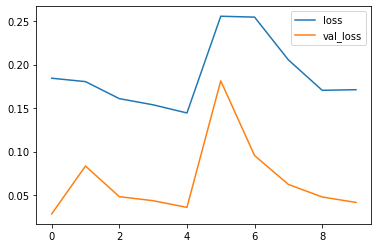

In [74]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

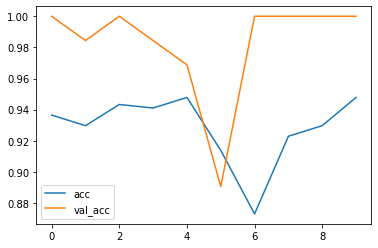

In [75]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()


In [82]:
model.save("/content/forest_model.h5")

**8. Test the model**

In [77]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

In [78]:
model=load_model('/content/forest_model.h5')

In [79]:
img=image.load_img('/content/drive/MyDrive/Dataset/test_set/with fire/Bandipur_fires_2019.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

# **Predictions**

In [28]:
pred=model.predict(x)

1/1 [==============================] - 0s 142ms/step


In [29]:
pred

array([[1.]], dtype=float32)

In [96]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  ctr=model.predict(x)
  print(ctr)
  if ctr==0:
    plt.xlabel(" No Fire detected",fontsize=30)
  elif ctr==1:
    plt.xlabel("Fire detected",fontsize=30)

1/1 [==============================] - 0s 120ms/step
[[0.]]


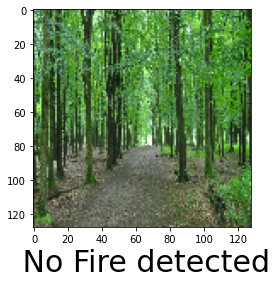

In [89]:
predictImage("/content/drive/MyDrive/Dataset/test_set/forest/1170x500_Ireland_web.jpg")

1/1 [==============================] - 0s 89ms/step
[[0.]]


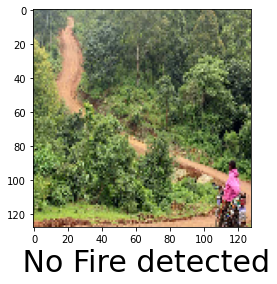

In [90]:
predictImage("/content/drive/MyDrive/Dataset/test_set/forest/1_chimp.jpg")

1/1 [==============================] - 0s 84ms/step
[[0.]]


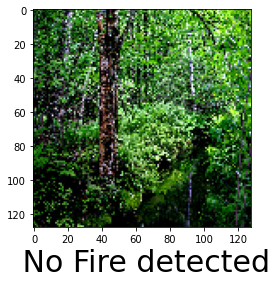

In [91]:
predictImage("/content/drive/MyDrive/Dataset/test_set/forest/acadia_np_622419_High_Res.jpg")

1/1 [==============================] - 0s 85ms/step
[[1.]]


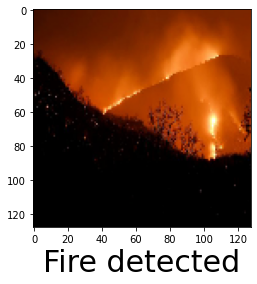

In [92]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/Fire_2_696x392.jpg")

1/1 [==============================] - 0s 94ms/step
[[1.]]


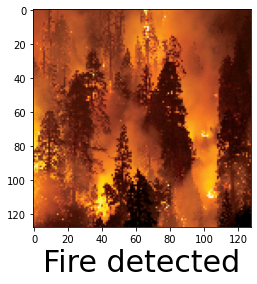

In [93]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/Wild_fires.jpg")

1/1 [==============================] - 0s 110ms/step
[[1.]]


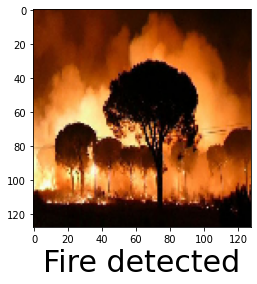

In [98]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/image.jpg")

# **Sending Alert message**

In [80]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [101]:
#load the saved model
model = load_model(r'/content/forest_model.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/Fighting Fire with Fire _ Explained in 30 Seconds.mp4')
#define the features
name = ['forest','with forest']


In [94]:
from twilio.rest import Client 
 
account_sid = 'AC3802cd6ad4404020aec5a0af250c949b' 
auth_token = '3fa5c04ca63d7ec8967a0b6b605c690a' 
client = Client(account_sid, auth_token)
 
 
message = client.messages.create(  
                              messaging_service_sid='MG4e6772afae18763c927203eb9b910eb0', 
                              body='Forest fire is detected, stay alert!',      
                              to='+917981572645' 
                          ) 
 
print(message.sid)
print("Fire detected")
print("SMS Sent!")

SM2e9b5530aa52d0b811edb8d2dcb0f29c
Fire detected
SMS Sent!
